## SIIM ISIC MELANOMA DETECTION - Analysis using Logistic Regression

We have used Logistic regression because our dataset can be classified in the form of Dichotomous variable i.e. 0 for benign and 1 for malignant images in context of this Dataset.

In [1]:
'''Installing dependant libraries'''

!pip install pydicom

In [2]:
'''Importing required libraries'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pydicom as dicom
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [3]:
'''Reading the data'''

df = pd.read_csv('C:/Users/gnana/Downloads/train.csv/train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
'''Checking for NULL values'''

df.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

### Removing the NULL Values

In [5]:
'''Dropping the NULL Values'''

df = df.dropna(axis=0, how = 'any')

In [6]:
df.isnull().sum()

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
benign_malignant                 0
target                           0
dtype: int64

# EDA

Text(0.5, 1.0, 'Count plot of age of people having malignant cancer')

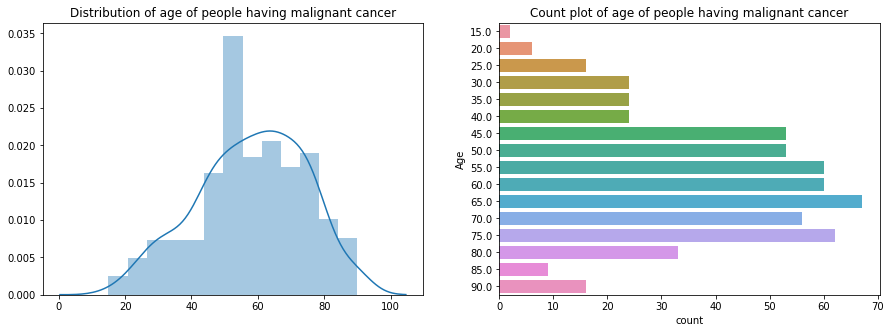

In [7]:
'''Visualizing the distribution and count of age who have cancer'''

age = []
sex = []
for i in range(df.shape[0]):
    try: 
        if df['target'][i] == 1:
            age.append(df['age_approx'][i]) 
            sex.append(df['sex'][i])
    except:
        pass

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(age)
plt.title('Distribution of age of people having malignant cancer')

plt.subplot(1,2,2)
sns.countplot(y = age)
plt.ylabel('Age')
plt.title('Count plot of age of people having malignant cancer')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

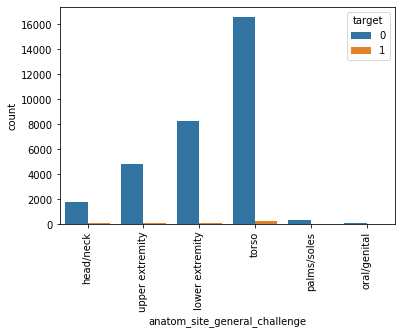

In [8]:
'''Visualizing count of anatom_site_general_challenge based on target'''

sns.countplot(x='anatom_site_general_challenge', data=df, hue='target')
plt.xticks(rotation='90')

Text(0, 0.5, 'Site')

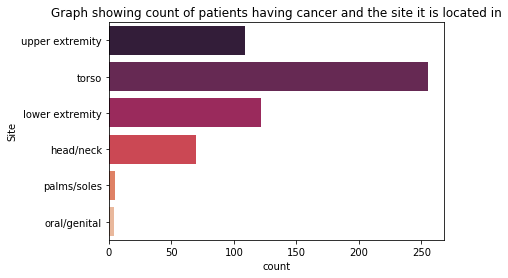

In [9]:
'''Visualizing count of anatom_site_general_challenge based on people having cancer'''

site = []
for i in range(df.shape[0]):
    try: 
        if df['target'][i] == 1:
            site.append(df['anatom_site_general_challenge'][i]) 
    except:
        pass

sns.countplot(y = site,palette="rocket")
plt.title('Graph showing count of patients having cancer and the site it is located in')
plt.ylabel('Site')

In [10]:
'''One hot encoding for column sex'''

df = pd.get_dummies(df, columns = ['sex'],drop_first=True)
df.head()

,image_name,patient_id,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,sex_male
0,ISIC_2637011,IP_7279968,45.0,head/neck,unknown,benign,0,1
1,ISIC_0015719,IP_3075186,45.0,upper extremity,unknown,benign,0,0
2,ISIC_0052212,IP_2842074,50.0,lower extremity,nevus,benign,0,0
3,ISIC_0068279,IP_6890425,45.0,head/neck,unknown,benign,0,0
4,ISIC_0074268,IP_8723313,55.0,upper extremity,unknown,benign,0,0


In [11]:
'''One hot encoding for column anatom_site_general_challenge'''

df = pd.get_dummies(df, columns = ['anatom_site_general_challenge'])
df.head()

,image_name,patient_id,age_approx,diagnosis,benign_malignant,target,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity
0,ISIC_2637011,IP_7279968,45.0,unknown,benign,0,1,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,45.0,unknown,benign,0,0,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,50.0,nevus,benign,0,0,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,45.0,unknown,benign,0,0,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,55.0,unknown,benign,0,0,0,0,0,0,0,1


In [12]:
'''One hot encoding for column diagnosis'''

df = pd.get_dummies(df, columns = ['diagnosis'])

In [13]:
'''Droping diagnosis_unknown column'''

df = df.drop('diagnosis_unknown', axis = 1)
df.head()

,image_name,patient_id,age_approx,benign_malignant,target,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,diagnosis_atypical melanocytic proliferation,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo
0,ISIC_2637011,IP_7279968,45.0,benign,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ISIC_0015719,IP_3075186,45.0,benign,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,ISIC_0052212,IP_2842074,50.0,benign,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,ISIC_0068279,IP_6890425,45.0,benign,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ISIC_0074268,IP_8723313,55.0,benign,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [14]:
'''Dropping benign_malignant and patient_id columns'''

df = df.drop(['benign_malignant', 'patient_id'], axis = 1)
df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,diagnosis_atypical melanocytic proliferation,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo
0,ISIC_2637011,45.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ISIC_0015719,45.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,ISIC_0052212,50.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,ISIC_0068279,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ISIC_0074268,55.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


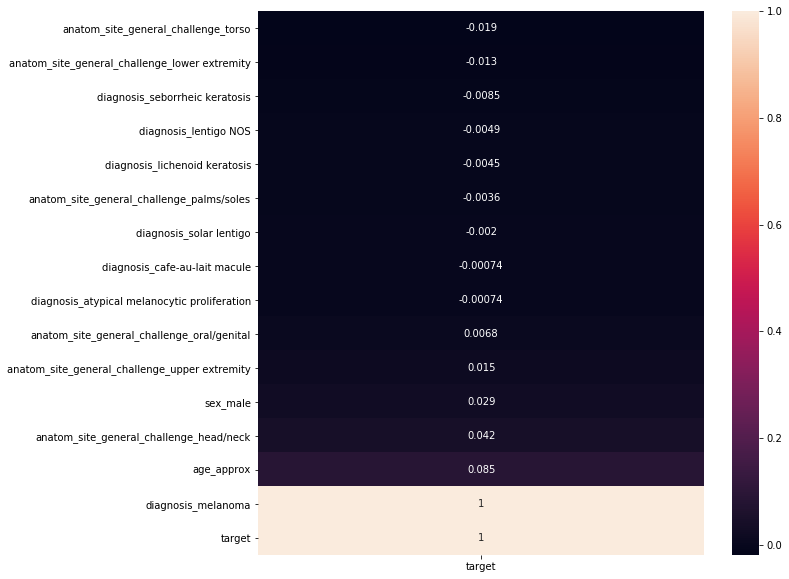

In [15]:
'''Correlation matrix based on target'''

plt.figure(figsize = (10,10))
sns.heatmap(df.corr()[['target']].sort_values('target').tail(16), annot = True)

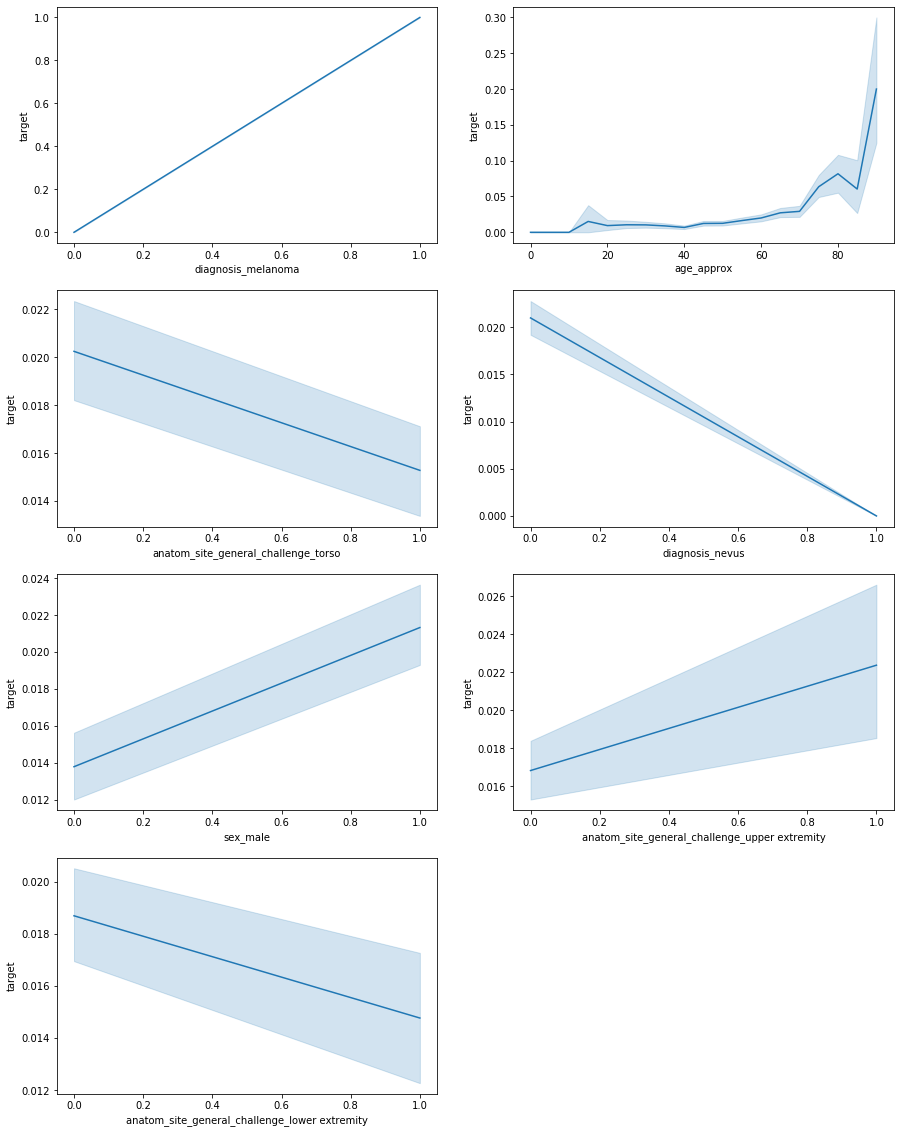

In [16]:
'''line plots of different columns in our dataset '''

plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.lineplot(df['diagnosis_melanoma'], df['target'])
plt.subplot(4,2,2)
sns.lineplot(df['age_approx'], df['target'])
plt.subplot(4,2,3)
sns.lineplot(df['anatom_site_general_challenge_torso'], df['target'])
plt.subplot(4,2,4)
sns.lineplot(df['diagnosis_nevus'], df['target'])
plt.subplot(4,2,5)
sns.lineplot(df['sex_male'], df['target'])
plt.subplot(4,2,6)
sns.lineplot(df['anatom_site_general_challenge_upper extremity'], df['target'])
plt.subplot(4,2,7)
sns.lineplot(df['anatom_site_general_challenge_lower extremity'], df['target'])

In [17]:
'''Splitting the features and target'''

X = df[['diagnosis_melanoma','anatom_site_general_challenge_torso','diagnosis_nevus','anatom_site_general_challenge_lower extremity','anatom_site_general_challenge_upper extremity', 'sex_male', 'age_approx']]
y = df['target']

In [18]:
'''Splitting the data into train and test'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Logistic Regression

In [19]:
'''Training and predicting using Logistic Regression'''

classifier_lr = LogisticRegression(max_iter=1000)
classifier_lr.fit(X_train,y_train)

y_pred_lr = classifier_lr.predict(X_test)

In [20]:
'''Accuracy and Confusion Matrix'''

print('Accuracy Score: ',accuracy_score(y_test,y_pred_lr))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_lr))

Accuracy Score:  1.0
Confusion Matrix: 
 [[6396    0]
 [   0  111]]


In [21]:
'''Fucntion for ROC'''

def roccurve(X_test,y_test,model):
    lr_probs = model.predict_proba(X_test)
    ns_probs = [0 for _ in range(len(y_test))]
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    ns_auc = roc_auc_score(y_test, ns_probs)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, ns_auc

In [22]:
'''Fucntion for Confusion Matrix'''

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

            plt.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [23]:
'''Accuracy, Confusion Matrix and Classfication report'''

precision_lr,recall_lr,fscore_lr,support_lr=score(y_test, y_pred_lr,average='macro')
acc_lr= accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Accuracy score for logistic regression:\n',acc_lr)
print('\n')
print('Confusion matrix for logistic regression:\n',cm_lr)
print('\n')
print('Classification Report for logistic regression:\n', classification_report(y_test, y_pred_lr))

Accuracy score for logistic regression:
 1.0


Confusion matrix for logistic regression:
 [[6396    0]
 [   0  111]]


Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6396
           1       1.00      1.00      1.00       111

    accuracy                           1.00      6507
   macro avg       1.00      1.00      1.00      6507
weighted avg       1.00      1.00      1.00      6507



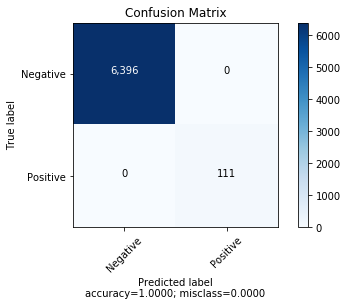

In [24]:
plot_confusion_matrix(cm= np.array(cm_lr),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

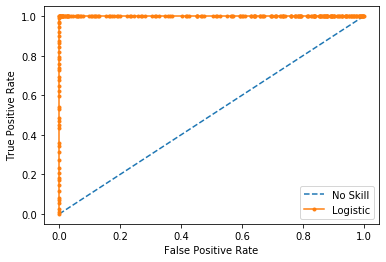

Logistic: ROC AUC=1.000
No Skill: ROC AUC=0.500


In [25]:
'''ROC curve'''

lr_auc, ns_auc = roccurve(X_test,y_test,classifier_lr)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Image Analysis

(4000, 6000, 3)


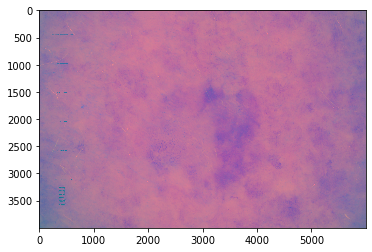

In [26]:
'''Displaying an image randomly from the data'''

image = 'C:/Users/gnana/Downloads/train/' + df['image_name'][91] +'.dcm'
ds = dicom.dcmread(image)
print((ds.pixel_array).shape)
plt.imshow(ds.pixel_array)

In [27]:
'''Undersampling the data to 100 images'''

s0 = df.target[df.target.eq(0)].sample(500, random_state=1).index
s1 = df.target[df.target.eq(1)].sample(500,random_state=1).index 

df_train = df.loc[s0.union(s1)]
df_train['target'].value_counts()

1    500
0    500
Name: target, dtype: int64

In [28]:
'''Getting the images data and flattening them'''

images = [] 

for x in df_train['image_name']:
    image = 'C:/Users/gnana/Downloads/train/' + x +'.dcm'
    try:
        ds = dicom.dcmread(image)
        pixels = ds.pixel_array
        images.append(pixels.flatten())
    except:
        print(x)
        pass

In [29]:
print(images[0].shape)

(72000000,)


In [30]:
'''pad_sequences is used to ensure that all sequences in a list have the same length'''

import tensorflow as tf
images = tf.keras.preprocessing.sequence.pad_sequences(
  images,
  maxlen = 720,
  dtype = "int32",
  padding = "pre",
  truncating = "pre",
  value = 0
)


### Model

In [31]:
'''training the data'''

from sklearn.linear_model import LogisticRegression
X = images
y = np.array(df_train['target'])
classifier_lr = LogisticRegression(C=1,max_iter=100,penalty='l2')
classifier_lr.fit(X,y)

C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
'''Training the data using GridSearchCV'''

X = images
y = np.array(df_train['target'])
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(X,y)

C:\Users\gnana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gnana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
'''The test data'''

test = df.tail(100)
test.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,diagnosis_atypical melanocytic proliferation,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo
33023,ISIC_9971202,45.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
33024,ISIC_9971280,50.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
33026,ISIC_9971896,20.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
33027,ISIC_9972518,50.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
33028,ISIC_9972557,50.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
'''Getting the images data and flattening them'''

test_images = []
for x in test['image_name']:
    image = 'C:/Users/gnana/Downloads/train/' + x +'.dcm'
    ds = dicom.dcmread(image)
    pixels = ds.pixel_array
    
    test_images.append(pixels.flatten())

In [35]:
'''pad_sequences is used to ensure that all sequences in a list have the same length'''

test_images = tf.keras.preprocessing.sequence.pad_sequences(
  test_images,
  maxlen = 720,
  dtype = "int32",
  padding = "pre",
  truncating = "pre",
  value = 0
)

### Prediction

In [36]:
'''Predicting the test data using Logistic Regression'''

X_test = test_images
y_test = np.array(test['target'])
y_pred = classifier_lr.predict(X_test)

In [37]:
'''Accuracy, Confusion Matrix and Classfication report'''

precision_lr,recall_lr,fscore_lr,support_lr=score(y_test, y_pred,average='macro')
acc_lr= accuracy_score(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)
print('Accuracy score for logistic regression:\n',acc_lr)
print('\n')
print('Confusion matrix for logistic regression:\n',cm_lr)
print('\n')
print('Classification Report for logistic regression:\n', classification_report(y_test, y_pred))

Accuracy score for logistic regression:
 0.74


Confusion matrix for logistic regression:
 [[73 25]
 [ 1  1]]


Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85        98
           1       0.04      0.50      0.07         2

    accuracy                           0.74       100
   macro avg       0.51      0.62      0.46       100
weighted avg       0.97      0.74      0.83       100



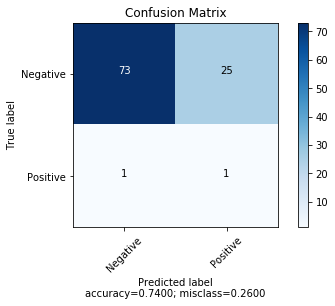

In [38]:
'''Plotting Confusion Matrix'''

plot_confusion_matrix(cm= np.array(cm_lr),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

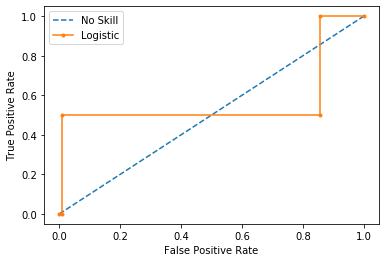

Logistic: ROC AUC=0.566
No Skill: ROC AUC=0.500


In [39]:
'''Plotting ROC curve'''

lr_auc, ns_auc = roccurve(X_test,y_test,classifier_lr)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

In [40]:
'''Predicting the test data using GridSearchCV'''

X_test = test_images
y_test = np.array(test['target'])
y_pred_lr = log_reg_cv.predict(X_test)

In [41]:
'''Accuracy and Confusion Matrix'''

precision_lr,recall_lr,fscore_lr,support_lr=score(y_test, y_pred_lr,average='macro')
acc_lr= accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Accuracy score for logistic regression:\n',acc_lr)
print('\n')
print('Confusion matrix for logistic regression:\n',cm_lr)
print('\n')
print('Classification Report for logistic regression:\n', classification_report(y_test, y_pred))

Accuracy score for logistic regression:
 0.6


Confusion matrix for logistic regression:
 [[59 39]
 [ 1  1]]


Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85        98
           1       0.04      0.50      0.07         2

    accuracy                           0.74       100
   macro avg       0.51      0.62      0.46       100
weighted avg       0.97      0.74      0.83       100



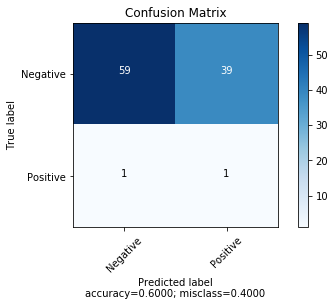

In [42]:
'''Plotting Confusion Matrix'''

plot_confusion_matrix(cm= np.array(cm_lr),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

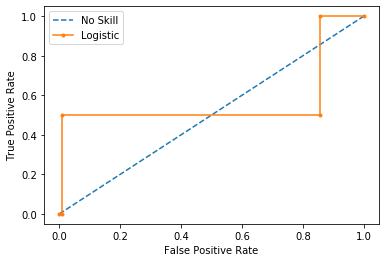

Logistic: ROC AUC=0.566
No Skill: ROC AUC=0.500


In [43]:
'''Plotting ROC curve'''

lr_auc, ns_auc = roccurve(X_test,y_test,classifier_lr)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))